In [2]:
import pandas as pd

df = pd.read_csv("cmc_market_hourly.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.sort_values("timestamp").reset_index(drop=True)

df.head()

,timestamp,total_market_cap,total_volume_24h,total_volume_24h_reported,altcoin_market_cap,altcoin_volume_24h,altcoin_volume_24h_reported
0,2025-03-20 00:05:00+00:00,2.852929e+12,1.014235e+11,6.174540e+11,1.119836e+12,6.697963e+10,3.924743e+11
1,2025-03-20 00:10:00+00:00,2.853917e+12,1.020305e+11,6.219559e+11,1.120613e+12,6.734505e+10,3.940602e+11
2,2025-03-20 00:15:00+00:00,2.853543e+12,1.024006e+11,6.245771e+11,1.121208e+12,6.739788e+10,3.950990e+11
3,2025-03-20 00:20:00+00:00,2.847146e+12,1.025989e+11,6.256588e+11,1.118193e+12,6.722145e+10,3.954406e+11
4,2025-03-20 00:25:00+00:00,2.839911e+12,1.014993e+11,6.269865e+11,1.116159e+12,6.717532e+10,3.961300e+11


Mean Squared Error: 0.0001
Mean Absolute Error: 0.0072
R2 Score: 0.9959


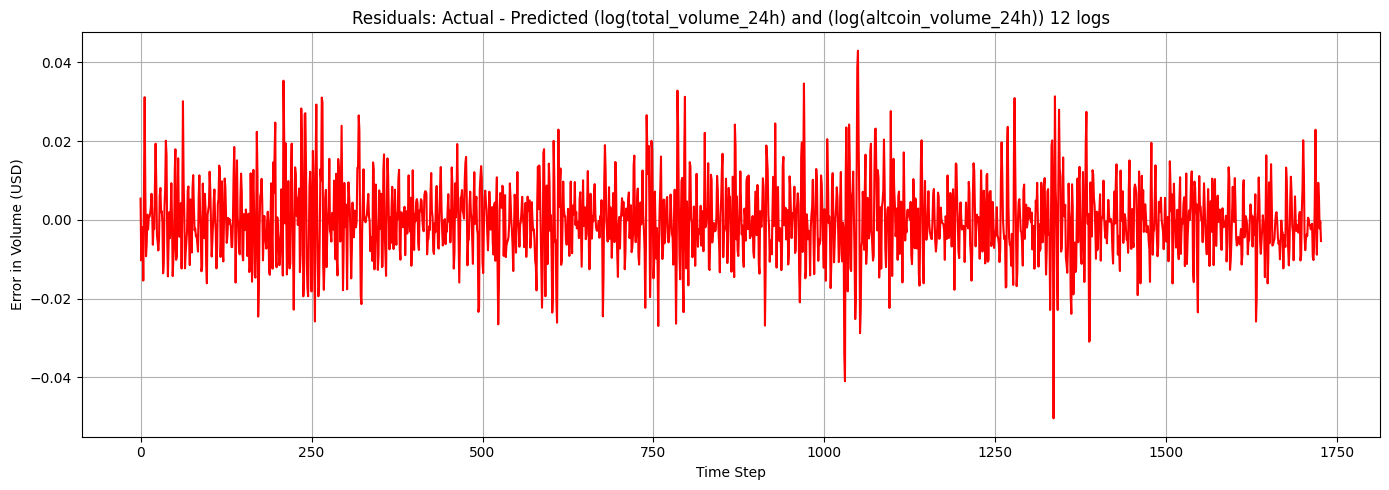

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df["log_total_volume_24h"] = np.log(df["total_volume_24h"])
df["log_altcoin_volume_24h"] = np.log(df["altcoin_volume_24h"])

df["target"] = df["log_total_volume_24h"].shift(-1)

for i in range(1, 7):
    df[f"lag_{i}"] = df["log_total_volume_24h"].shift(i)
    df[f"lag_altcoin_{i}"] = df["log_altcoin_volume_24h"].shift(i)

feature_cols = [f"lag_{i}" for i in range(1, 7)] + [f"lag_altcoin_{i}" for i in range(1, 7)]
df_model = df[["target"] + feature_cols].dropna()

X = df_model[feature_cols]
y = df_model["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted (log(total_volume_24h) and (log(altcoin_volume_24h)) 12 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error: 0.0003
Mean Absolute Error: 0.0124
R2 Score: 0.9881


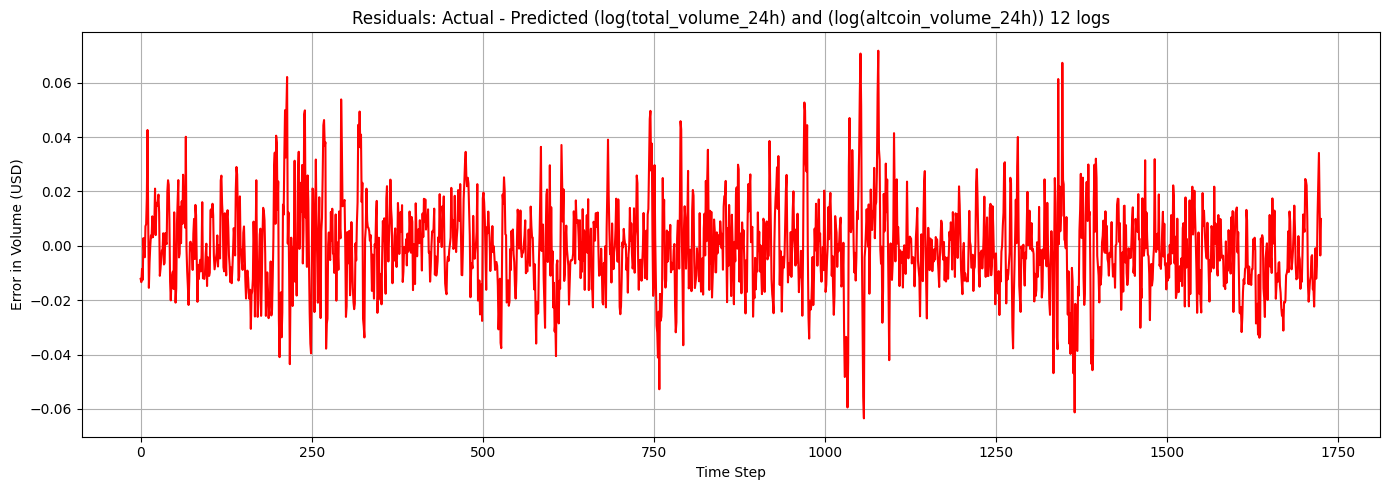

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df["log_total_volume_24h"] = np.log(df["total_volume_24h"])
df["log_altcoin_volume_24h"] = np.log(df["altcoin_volume_24h"])

df["target"] = df["log_total_volume_24h"].shift(-6)

for i in range(1, 7):
    df[f"lag_{i}"] = df["log_total_volume_24h"].shift(i)
    df[f"lag_altcoin_{i}"] = df["log_altcoin_volume_24h"].shift(i)

feature_cols = [f"lag_{i}" for i in range(1, 7)] + [f"lag_altcoin_{i}" for i in range(1, 7)]
df_model = df[["target"] + feature_cols].dropna()

X = df_model[feature_cols]
y = df_model["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted for 30 mins (log(total_volume_24h) and (log(altcoin_volume_24h)) 12 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error: 0.0006
Mean Absolute Error: 0.0188
R2 Score: 0.9732


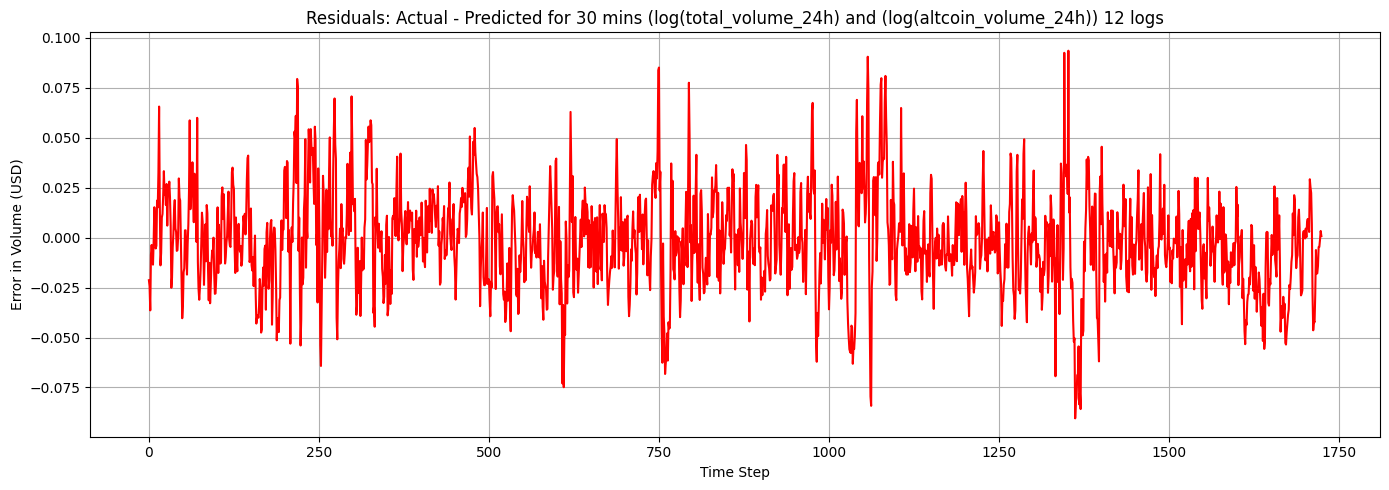

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df["log_total_volume_24h"] = np.log(df["total_volume_24h"])
df["log_altcoin_volume_24h"] = np.log(df["altcoin_volume_24h"])

df["target"] = df["log_total_volume_24h"].shift(-12)

for i in range(1, 7):
    df[f"lag_{i}"] = df["log_total_volume_24h"].shift(i)
    df[f"lag_altcoin_{i}"] = df["log_altcoin_volume_24h"].shift(i)

feature_cols = [f"lag_{i}" for i in range(1, 7)] + [f"lag_altcoin_{i}" for i in range(1, 7)]
df_model = df[["target"] + feature_cols].dropna()

X = df_model[feature_cols]
y = df_model["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted for 60 mins (log(total_volume_24h) and (log(altcoin_volume_24h)) 12 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error: 0.0013
Mean Absolute Error: 0.0269
R2 Score: 0.9449


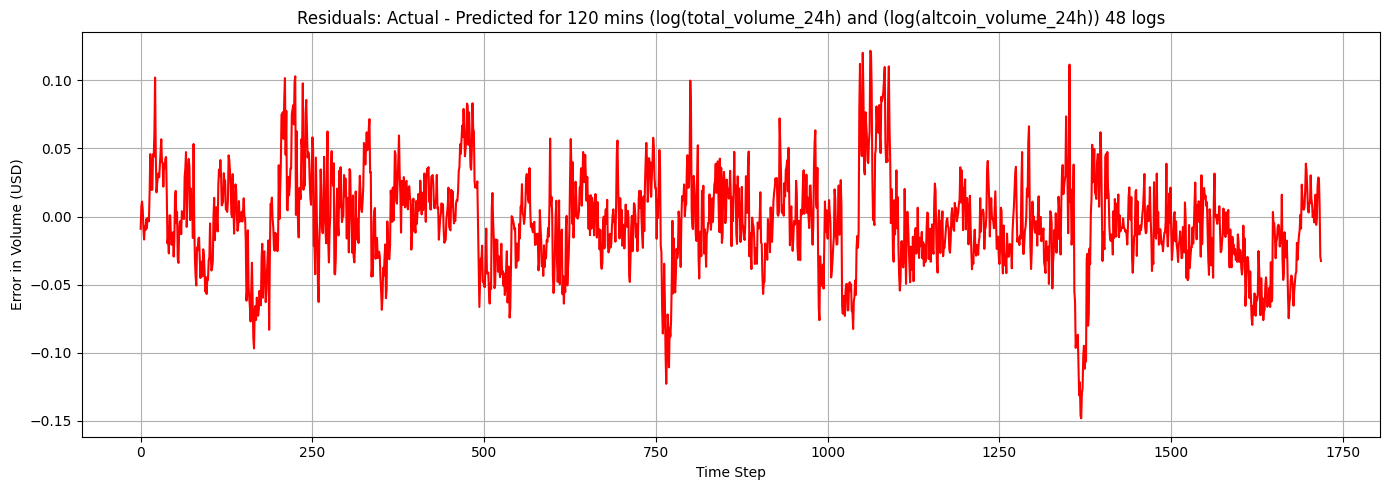

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

df["log_total_volume_24h"] = np.log(df["total_volume_24h"])
df["log_altcoin_volume_24h"] = np.log(df["altcoin_volume_24h"])

df["target"] = df["log_total_volume_24h"].shift(-24)

for i in range(1, 25):
    df[f"lag_{i}"] = df["log_total_volume_24h"].shift(i)
    df[f"lag_altcoin_{i}"] = df["log_altcoin_volume_24h"].shift(i)

feature_cols = [f"lag_{i}" for i in range(1, 25)] + [f"lag_altcoin_{i}" for i in range(1, 25)]
df_model = df[["target"] + feature_cols].dropna()

X = df_model[feature_cols]
y = df_model["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R2 Score: {r2:.4f}")

y_true = pd.Series(y_test.values).reset_index(drop=True)
y_pred_series = pd.Series(y_pred).reset_index(drop=True)

residuals = y_true - y_pred_series

plt.figure(figsize=(14, 5))
plt.plot(residuals, color="red")
plt.title("Residuals: Actual - Predicted for 120 mins (log(total_volume_24h) and (log(altcoin_volume_24h)) 48 logs")
plt.xlabel("Time Step")
plt.ylabel("Error in Volume (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()